# Self-Organizing Maps (SOMs) Notebook
## Load "winning" SOMs - Step 4

**Notebook by Maria J. Molina (NCAR) and Alice DuVivier (NCAR).**

**Still very much in progress**

This Notebook reads in the pickle files saved as possible "winning" SOMs.

In [1]:
import pandas as pd
from minisom import MiniSom, asymptotic_decay
import xarray as xr
import cftime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from datetime import timedelta
from itertools import product
import seaborn as sns
import pickle
import sammon

### Set User-specified information

In [2]:
# set: variable to test, the location of the already extracted training data
var_in = 'aice_d'
sector_short = 'Ross'
data_path = '/glade/p/cgd/ppc/duvivier/cesm2_antarctic_polynya/SOM_analysis/training/'+sector_short+'_v5/'

In [3]:
# set possible grid sizes. These are paired values.
som_grid_rows    = [3, 4, 5]    # (y-axis)
som_grid_cols    = [3, 4, 5]    # (x-axis)

In [4]:
# MANUAL CHANGING REQUIRED HERE
n = 2
# n = 0-2 (matches sizes set above)

som_row = som_grid_rows[n]
som_col = som_grid_cols[n]

### Load CSV with winning combos

In [5]:
# read in the file with all the possible soms
df = pd.read_csv(data_path+'test_soms_qerror_'+sector_short+'_'+var_in+'_'+str(som_row)+'x'+str(som_col)+'.csv')

In [6]:
# sort values by q_error
sorted_df = df.sort_values(['q_error'])

# find and save the lowest qerror for top # (10)
top_n = sorted_df.head(10)
bottom_n = sorted_df.tail(10)
#print(top_n)

In [7]:
# grab the qerrors and make array against which to plot
qerr_all = sorted_df.q_error
xarr_all = np.arange(1,len(qerr_all)+1,1)
qerr_n = top_n.q_error
xarr_n = np.arange(1,len(qerr_n)+1,1)

### Load training data - Needed to interpret the pickle

In [8]:
def normalize_data(data):
    """
    Function for normalizing data prior to training using z-score
    """
    return (data - np.nanmean(data)) / np.nanstd(data)

In [9]:
# open file saved in earlier notebook (soms_antarctica-gettingdata.ipynb)
subset = xr.open_dataset(data_path+'training_data_region_'+sector_short+'_'+var_in+'.nc')

# assign to numpy array object
subsetarray = subset['train_data'].values

# set data
data = normalize_data(subsetarray)

# set data input length
input_length = subsetarray.shape[1]    # using preprocessed data array; Number of the elements of the vectors in input.


## Plot frequencies across lattice

1th lowest qerror
2th lowest qerror
3th lowest qerror
4th lowest qerror
5th lowest qerror
6th lowest qerror
7th lowest qerror
8th lowest qerror
9th lowest qerror
10th lowest qerror


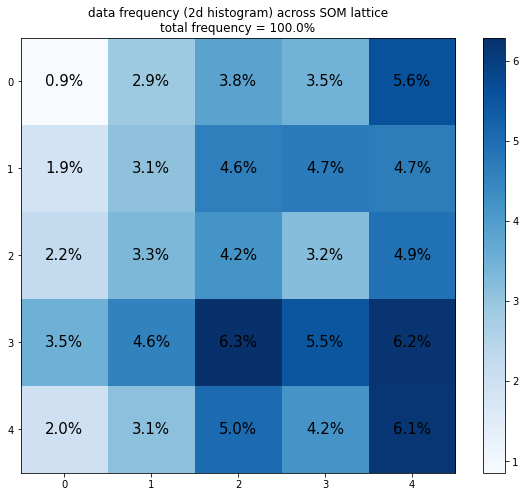

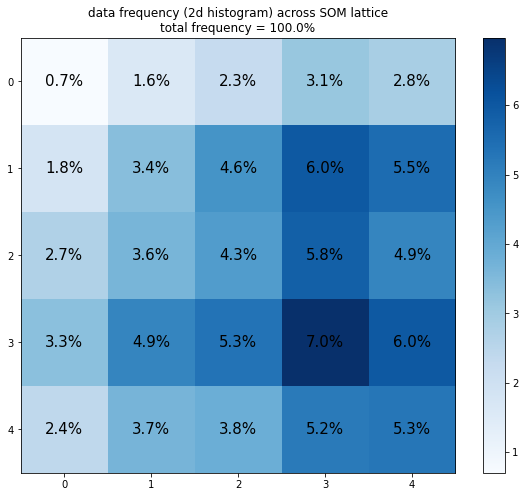

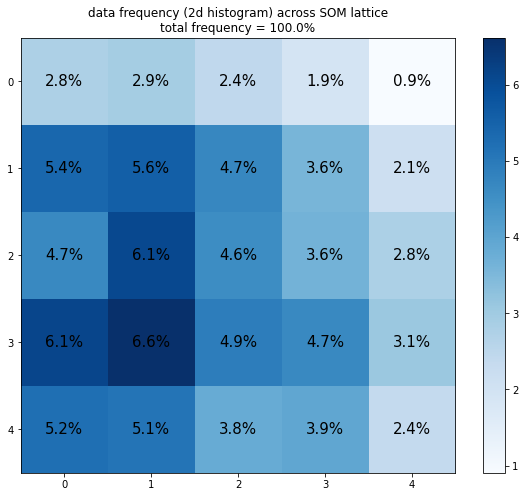

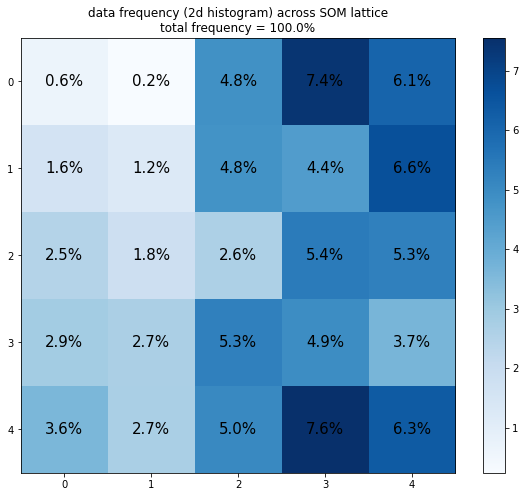

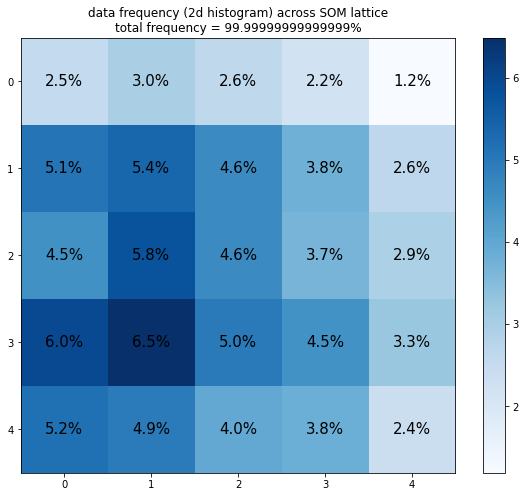

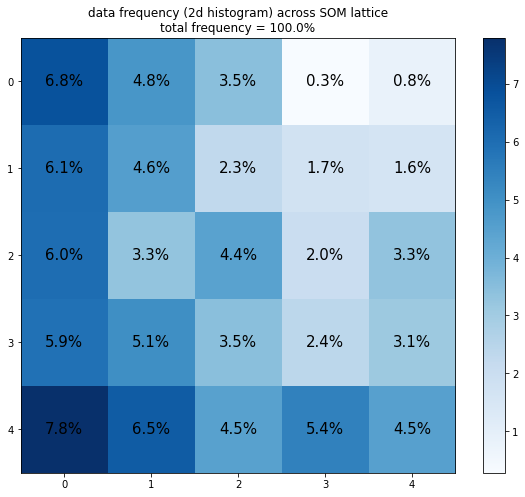

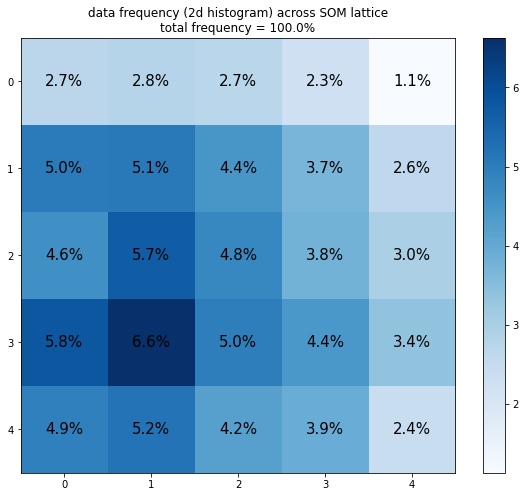

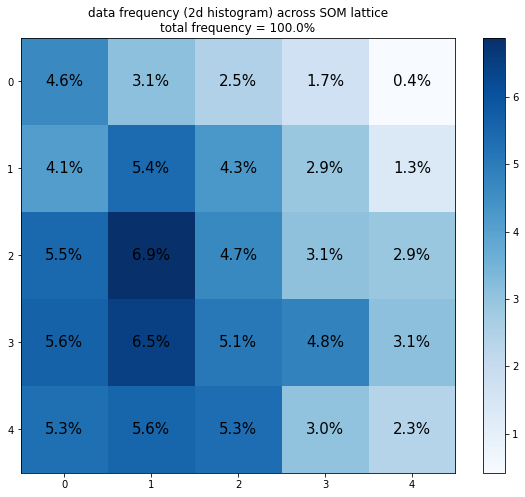

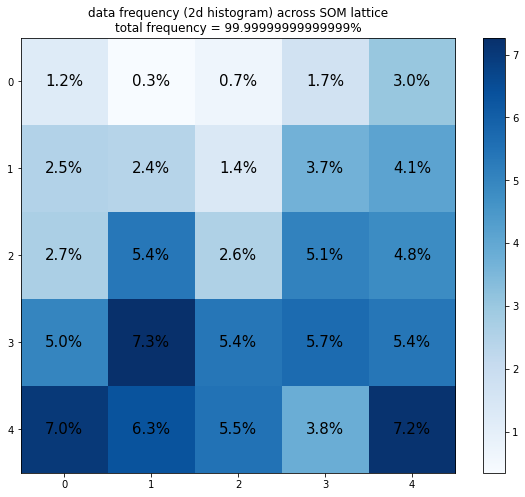

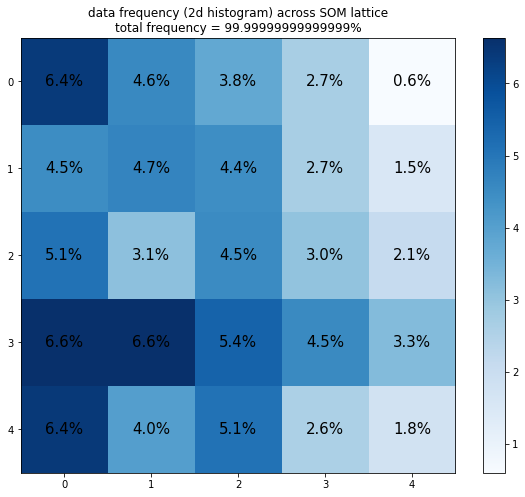

In [10]:
# Loop through the lowest values and load in the relevant pickle

#for n in xarr_n[0:1]:
for n in xarr_n:
    print(str(n)+'th lowest qerror')
    
    # set the training values
    qerr = top_n.iloc[n-1]['q_error'].item()
    sig = top_n.iloc[n-1]['sigma'].item()
    lr = top_n.iloc[n-1]['lr'].item()
    n_iter = int(top_n.iloc[n-1]['n_iter'].item())
    
    # construct the input name from this, set as output for figure names
    fin = 'som_'+sector_short+'_'+var_in+'_'+str(som_row)+'x'+str(som_col)+'_rank_'+str(n)+'_sig'+str(sig)+'_lr'+str(lr)+'_iter'+str(n_iter)

    # open pickle
    with open(data_path+'/pickles/'+fin+'.p', 'rb') as infile:
        som = pickle.load(infile)

    # set frequencies
    frequencies = 100.*((som.activation_response(data))/sum(sum(som.activation_response(data))))
    #verify the total frequency is 100%
    total = sum(sum(frequencies))

    # Plot frequencies across SOM lattice
    fig = plt.figure(figsize=(10,8))
    ax = plt.subplot(111)
    im = ax.imshow(frequencies, cmap='Blues')   
    
    # Loop over data dimensions and create text annotations in each cell
    len_x, len_y = frequencies.shape
    for i in range(len_x):
        for j in range(len_y):
            text = ax.text(j, i, str(round(frequencies[i, j],1))+'%', fontsize=15,
                       ha="center", va="center", color="k")

    # Make cosmetic changes
    cbar = plt.colorbar(im)
    plt.title(r"data frequency (2d histogram) across SOM lattice" "\n" r"total frequency = "+str(total)+"%", fontsize=12)
    plt.xticks(np.arange(0,som_row, 1))
    plt.yticks(np.arange(0,som_col, 1))
    
    # save figure
    fout = data_path+'som_evaluation/'+fin+'_freq.png'
    plt.savefig(fout, bbox_inches='tight', dpi=200)


## Plot Sammon maps

1th lowest qerror
TolFun exceeded: Optimisation terminated
2th lowest qerror
TolFun exceeded: Optimisation terminated
3th lowest qerror
TolFun exceeded: Optimisation terminated
4th lowest qerror
TolFun exceeded: Optimisation terminated
5th lowest qerror
TolFun exceeded: Optimisation terminated
6th lowest qerror
TolFun exceeded: Optimisation terminated
7th lowest qerror
TolFun exceeded: Optimisation terminated
8th lowest qerror
TolFun exceeded: Optimisation terminated
9th lowest qerror
TolFun exceeded: Optimisation terminated
10th lowest qerror
TolFun exceeded: Optimisation terminated


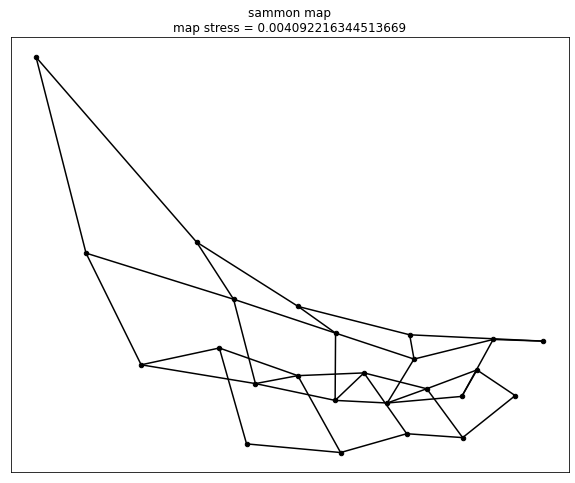

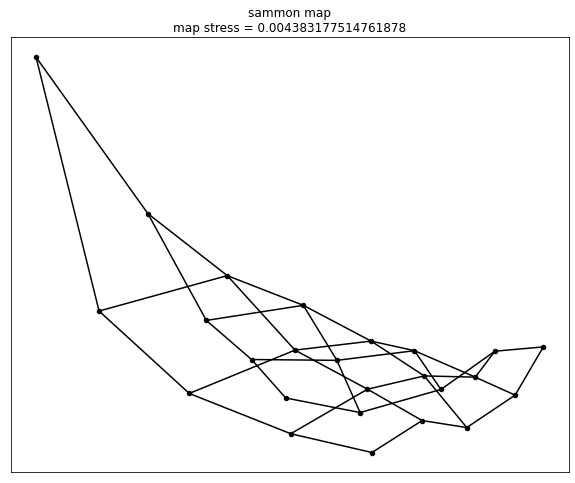

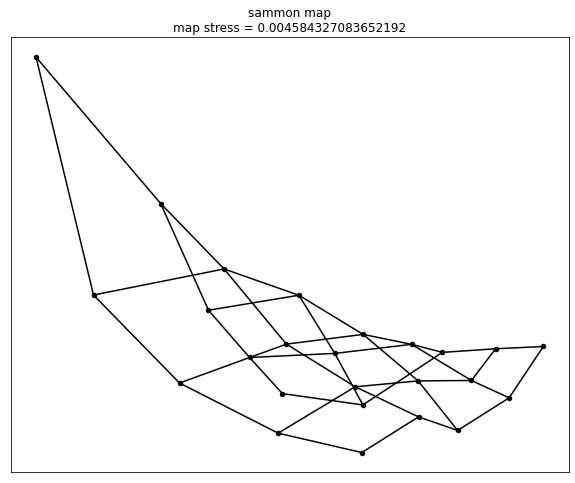

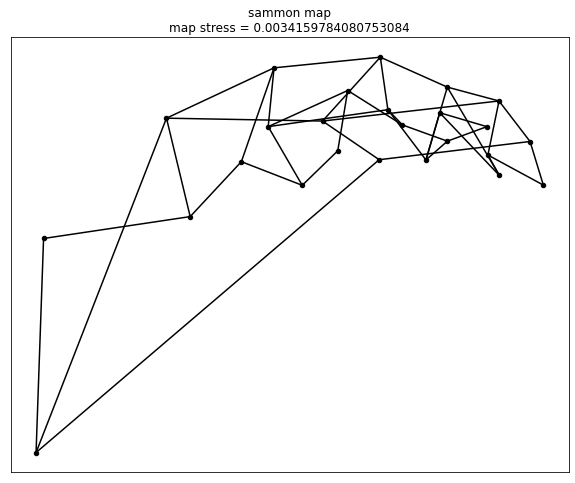

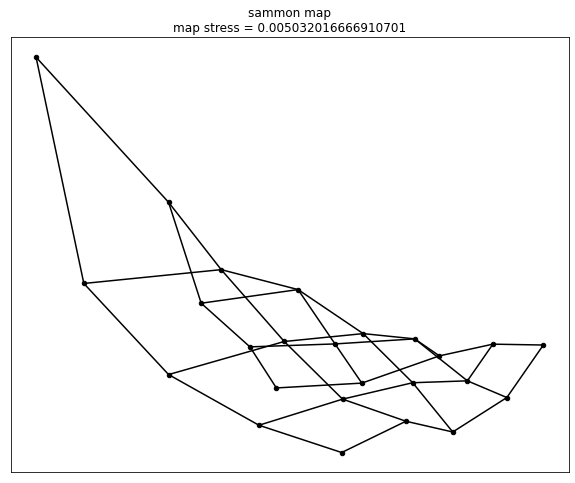

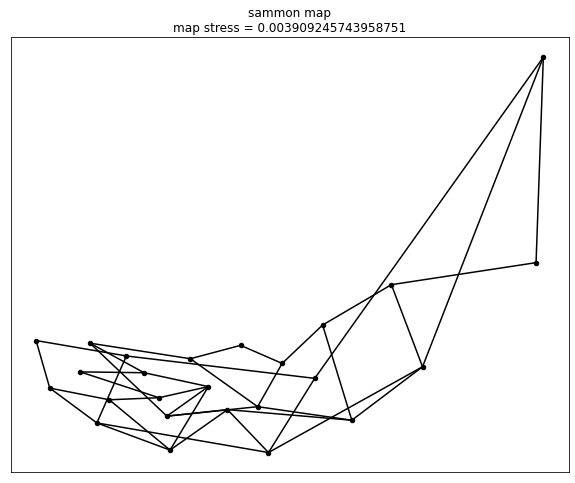

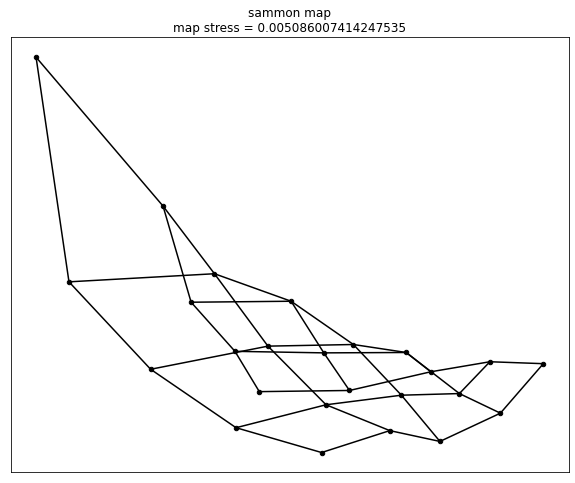

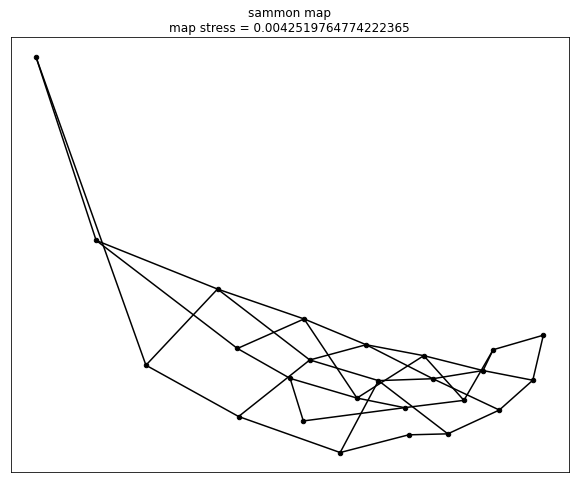

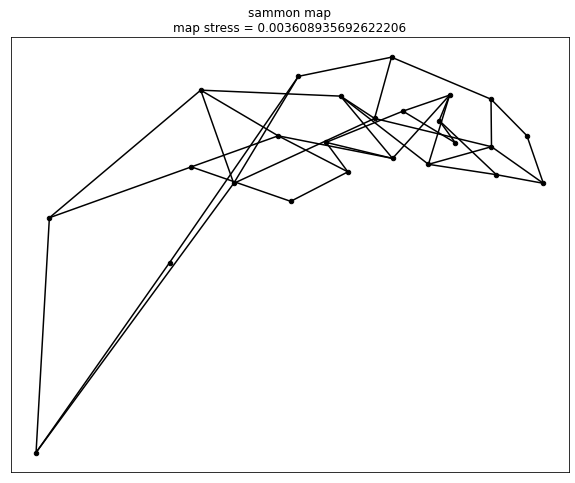

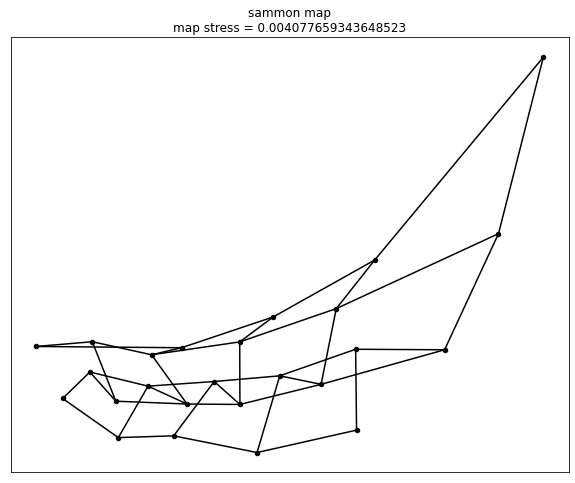

In [11]:
# Loop through the lowest values and load in the relevant pickle

#for n in xarr_n[0:1]:
for n in xarr_n:
    print(str(n)+'th lowest qerror')
    
    # set the training values
    qerr = top_n.iloc[n-1]['q_error'].item()
    sig = top_n.iloc[n-1]['sigma'].item()
    lr = top_n.iloc[n-1]['lr'].item()
    n_iter = int(top_n.iloc[n-1]['n_iter'].item())
    
    # construct the input name from this, set as output for figure names
    fin = 'som_'+sector_short+'_'+var_in+'_'+str(som_row)+'x'+str(som_col)+'_rank_'+str(n)+'_sig'+str(sig)+'_lr'+str(lr)+'_iter'+str(n_iter)

    # open pickle
    with open(data_path+'/pickles/'+fin+'.p', 'rb') as infile:
        som = pickle.load(infile)

    # Calculate sammon coordinates (y) for map and "map stress" (E)
    [y,E] = sammon.sammon(som.get_weights().reshape(som_col*som_row, input_length),2,display=1)

    # Plot Sammon map nodes
    fig = plt.figure(figsize=(10,8))
    plt.scatter(y[:,0], y[:,1], s=20, c='black', marker='o')

    # Add lines between nodes
    tmp = np.reshape(y,(som_col,som_row,2))
    len_x, len_y, len_z = tmp.shape
    
    # add vertical lines
    for i in range(len_x-1):
        for j in range(len_y):
            plt.plot(tmp[i:i+2,j,0],tmp[i:i+2,j,1],c='black')
    
    # add horizontal lines
    for i in range(len_x):
        for j in range(len_y-1):
            plt.plot(tmp[i,j:j+2,0],tmp[i,j:j+2,1],c='black')  
    
    plt.xticks([])
    plt.yticks([])
    plt.title(r"sammon map" "\n" r"map stress = "+str(E), fontsize=12)
    
    # save figure
    fout = data_path+'som_evaluation/'+fin+'_sammon.png'
    plt.savefig(fout, bbox_inches='tight', dpi=200)


## Plot composite maps

In [12]:
# set region of interest - for plotting
titles     = ['Ross Sea', 'Amundsen Bellingshausen Sea', 'Weddell Sea', 'Pacific Ocean', 'Indian Ocean']
shorts     = ['Ross', 'AMB', 'Wed', 'Pac', 'Ind']
masks      = ['Ross_mask', 'BAm_mask', 'Wed_mask', 'Pac_mask', 'Ind_mask']
lat_maxes  = [-72, -65, -65, -60, -60] 
lat_mins   = [-85, -85, -85, -80, -80]
lon_maxes  = [200, 300, 300, 90, 160] 
lon_mins   = [160, 220, 20, 20, 90]
lon_avgs   = [190, 260, 340, 55, 125]

In [13]:
# Based on sector set at top of script, set plotting limits
ind = shorts.index(sector_short)
sector_title = titles[ind]
mask_in = masks[ind]
lat_max = lat_maxes[ind]
lat_min = lat_mins[ind]
lon_max = lon_maxes[ind]
lon_min = lon_mins[ind]
lon_avg = lon_avgs[ind]

In [14]:
# Load data for larger area than only training area
# this data has been processed all the same 'time' coordinates as training data

# set data path
dir_in = data_path
# file name for training variable only here 
fin = 'antarctic_data_for_som_composites_'+var_in
# load data
ds = xr.open_mfdataset(dir_in+fin+'.nc')

In [15]:
# explicitly load data so that it doesn't take forever later on during mean
ds = ds.load()

In [16]:
# create an empty dictionary using the rows and columns of SOM
keys = [i for i in product(range(som_row),range(som_col))]
winmap = {key: [] for key in keys}

In [17]:
import dask  # importing dask just to skip warning message later

In [ ]:
# load the som and get indices to put in the winmap

# set some general plotting info
cmap_choice = plt.cm.get_cmap('bone')  #'coolwarm'
cmap_choice.set_bad(color='white')
# set colorbar ticks to be equal to scale of vmin and vmax
vmin_in = 0
vmax_in = 1
ticks_1 = np.arange(vmin_in,vmax_in,0.1)
    
#for n in xarr_n[0:1]:
for n in xarr_n:
    print(str(n)+'th lowest qerror')
    
    # set the training values
    qerr = top_n.iloc[n-1]['q_error'].item()
    sig = top_n.iloc[n-1]['sigma'].item()
    lr = top_n.iloc[n-1]['lr'].item()
    n_iter = int(top_n.iloc[n-1]['n_iter'].item())
    
    # construct the input name from this, set as output for figure names
    fin = 'som_'+sector_short+'_'+var_in+'_'+str(som_row)+'x'+str(som_col)+'_rank_'+str(n)+'_sig'+str(sig)+'_lr'+str(lr)+'_iter'+str(n_iter)

    # open pickle
    with open(data_path+'/pickles/'+fin+'.p', 'rb') as infile:
        som = pickle.load(infile)

    # grab the indices for the data within the SOM lattice
    for i, x in enumerate(data):
        winmap[som.winner(x)].append(i) 

    # create list of the dictionary keys
    som_keys = list(winmap.keys())
    print(f"Number of composite maps: {len(som_keys)}")
    print(f"The rows and columns of the SOM lattice to use to grab SOM indexes:\n{[i for i in list(winmap.keys())]}")
    
    # set some of the plot info
    fig, axs = plt.subplots(som_row, som_col, subplot_kw={'projection':ccrs.Stereographic(central_longitude=lon_avg)}, figsize=(14,12))
    
    # loop through the different maps to get the indices of training data that map there
    for map_num in range(len(som_keys)):
        # get indices of training data that mapped to this node
        inds = winmap[som_keys[map_num]]
        # grab the compositing data that corresponds to those training times
        with dask.config.set(**{'array.slicing.split_large_chunks': False}):
            ds_sub = ds.isel(training_times=inds)          
        ds_sub = ds_sub.mean(dim="training_times", skipna=True)
        
        # make plot for this node - note using .values converts from xarray to numpy array
        cs = axs[som_keys[map_num][0],som_keys[map_num][1]].pcolor(ds.coords['TLON'].values, 
                                                               ds.coords['TLAT'].values, 
                                                               ds_sub["data"].values, 
                                                               vmin=0, vmax=1, cmap=cmap_choice,
                                                               transform=ccrs.PlateCarree())
        
        axs[som_keys[map_num][0],som_keys[map_num][1]].set_extent([lon_min,lon_max,lat_min,lat_max])
        axs[som_keys[map_num][0],som_keys[map_num][1]].coastlines(resolution='110m', color='0.25', linewidth=0.5, zorder=10)
        axs[som_keys[map_num][0],som_keys[map_num][1]].add_feature(cartopy.feature.LAND, zorder=10, edgecolor='k', facecolor='w')    
        axs[som_keys[map_num][0],som_keys[map_num][1]].gridlines(linestyle='--', linewidth=0.5, zorder=11)
    
        # plot titles
        axs[som_keys[map_num][0],som_keys[map_num][1]].set_title('Node Frequency (%):{:.2f}'.format(frequencies.flatten()[map_num]), fontsize=12)
    
    # finalize figure 
    plt.suptitle(sector_title+' SOM '+var_in+' node composites - querror='+str(qerr), fontsize=12, x=0.515, y=0.925)

    # colorbar stuff
    cbar_ax = fig.add_axes([0.25,0.1,0.5,0.01])   # moved colorbar axes to this location
    cbar = fig.colorbar(cs, cax=cbar_ax, ticks=ticks_1[:],
                        orientation='horizontal', extend='both')
    cbar.ax.set_xticklabels(list(ticks_1))
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label('ice concentration (frac)', fontsize=12)
    
    # save figure
    fout = data_path+'som_evaluation/'+fin+'_composite.png'
    plt.savefig(fout, bbox_inches='tight', dpi=200)


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("bone").copy()
  """


1th lowest qerror
Number of composite maps: 25
The rows and columns of the SOM lattice to use to grab SOM indexes:
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


1989
6706


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


8896


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


8026


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


12977


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


4344


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


7188


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


10748


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


10944


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


10833


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


5195


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


7741


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


9735


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


7411


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


11443


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


8183


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


10604


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


14605


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


12763


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


14372


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


4648


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


7253


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


11701


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


9717


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


14278


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


2th lowest qerror
Number of composite maps: 25
The rows and columns of the SOM lattice to use to grab SOM indexes:
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
3622


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


10473


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


14123


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


15331


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


19564


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


8591


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


15060


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


21337


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


24808


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


23617


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


11481


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


16159


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


19729


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


20900


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


22811


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


15939


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


21967


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


26992


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


28953


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


28286


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


10254


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


15755


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


20579


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


21726


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


26543


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


3th lowest qerror
Number of composite maps: 25
The rows and columns of the SOM lattice to use to grab SOM indexes:
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
10077


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


17261


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


19793


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


19786


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


21668


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


21160


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


28048


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


32280


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


33102


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


28550


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


22340


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


30258


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


30373


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


29355


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


29277


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


30222


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


37340


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


38384


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


39809


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


35424


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


22398


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


27628


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


29427


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


30887


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


32053


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


4th lowest qerror
Number of composite maps: 25
The rows and columns of the SOM lattice to use to grab SOM indexes:
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
11537


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


17817


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


31010


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


36976


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


35787


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


24782


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


30917


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


43321


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


43417


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


43969


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


28097


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


34463


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


36500


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


41936


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


41519


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


36865


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


43536


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


50621


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


51283


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


43923


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


30726


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


33896


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


41131


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


48428


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


46743


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


5th lowest qerror
Number of composite maps: 25
The rows and columns of the SOM lattice to use to grab SOM indexes:
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
17458


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


24734


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


37093


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


42101


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


38554


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


36582


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


43396


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


54088


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


52211


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


50109


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


38551


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


47887


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


47258


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


50501


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


48362


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


50693


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


58596


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


62143


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


61697


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


51489


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


42730


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


45365


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


50348


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


57319


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


52235


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


6th lowest qerror
Number of composite maps: 25
The rows and columns of the SOM lattice to use to grab SOM indexes:
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]
33245


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


35941


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


45116


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


42765


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


40432


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


50655


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


53980


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


59340


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


56174


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


53855


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


52539


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


55511


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


57572


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


55144


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


56090


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)


64392


/glade/work/duvivier/miniconda3/envs/antarctica_som_env/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1982: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)
